In [ ]:
# I will perform analysis on data presenting various failure states for machine equipment 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [10]:
df = pd.read_csv('data/predictive_maintenance.csv')

In [11]:
df.dropna( inplace = True )

In [12]:
df_allnumeric = df.drop(columns=['Product ID', 'Type', 'Target','UDI'])

In [13]:
# remove all non failure types
failure_data = df_allnumeric[df_allnumeric['Failure Type'] != 'No Failure']

In [14]:
failure_data.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
50,298.9,309.1,2861,4.6,143,Power Failure
69,298.9,309.0,1410,65.7,191,Power Failure
77,298.8,308.9,1455,41.3,208,Tool Wear Failure
160,298.4,308.2,1282,60.7,216,Overstrain Failure
161,298.3,308.1,1412,52.3,218,Overstrain Failure


In [15]:
# Perform one-hot encoding
encoded_data = pd.get_dummies(failure_data, columns=['Failure Type'])

In [16]:
encoded_data.head(10)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type_Heat Dissipation Failure,Failure Type_Overstrain Failure,Failure Type_Power Failure,Failure Type_Random Failures,Failure Type_Tool Wear Failure
50,298.9,309.1,2861,4.6,143,0,0,1,0,0
69,298.9,309.0,1410,65.7,191,0,0,1,0,0
77,298.8,308.9,1455,41.3,208,0,0,0,0,1
160,298.4,308.2,1282,60.7,216,0,1,0,0,0
161,298.3,308.1,1412,52.3,218,0,1,0,0,0
168,298.4,308.3,1433,62.3,20,0,0,1,0,0
194,298.2,308.5,2678,10.7,86,0,0,1,0,0
207,298.4,308.7,1421,60.7,119,0,0,1,0,0
242,298.0,308.2,1348,58.8,202,0,1,0,0,0
248,298.0,308.3,1362,56.8,216,0,1,0,0,0


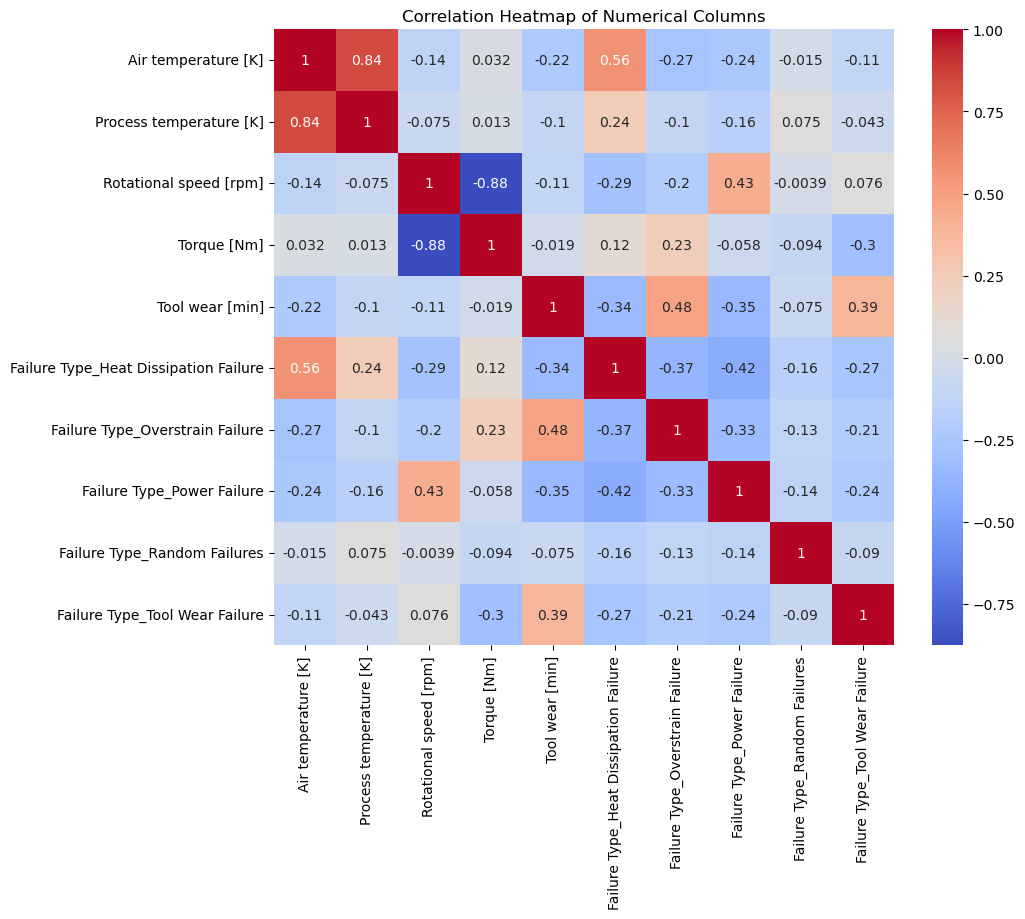

In [17]:
# Create heatmap of data
plt.figure(figsize=(10, 8))  # Set the size of the figure
sns.heatmap(encoded_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

Text(0.5, 1.0, '')

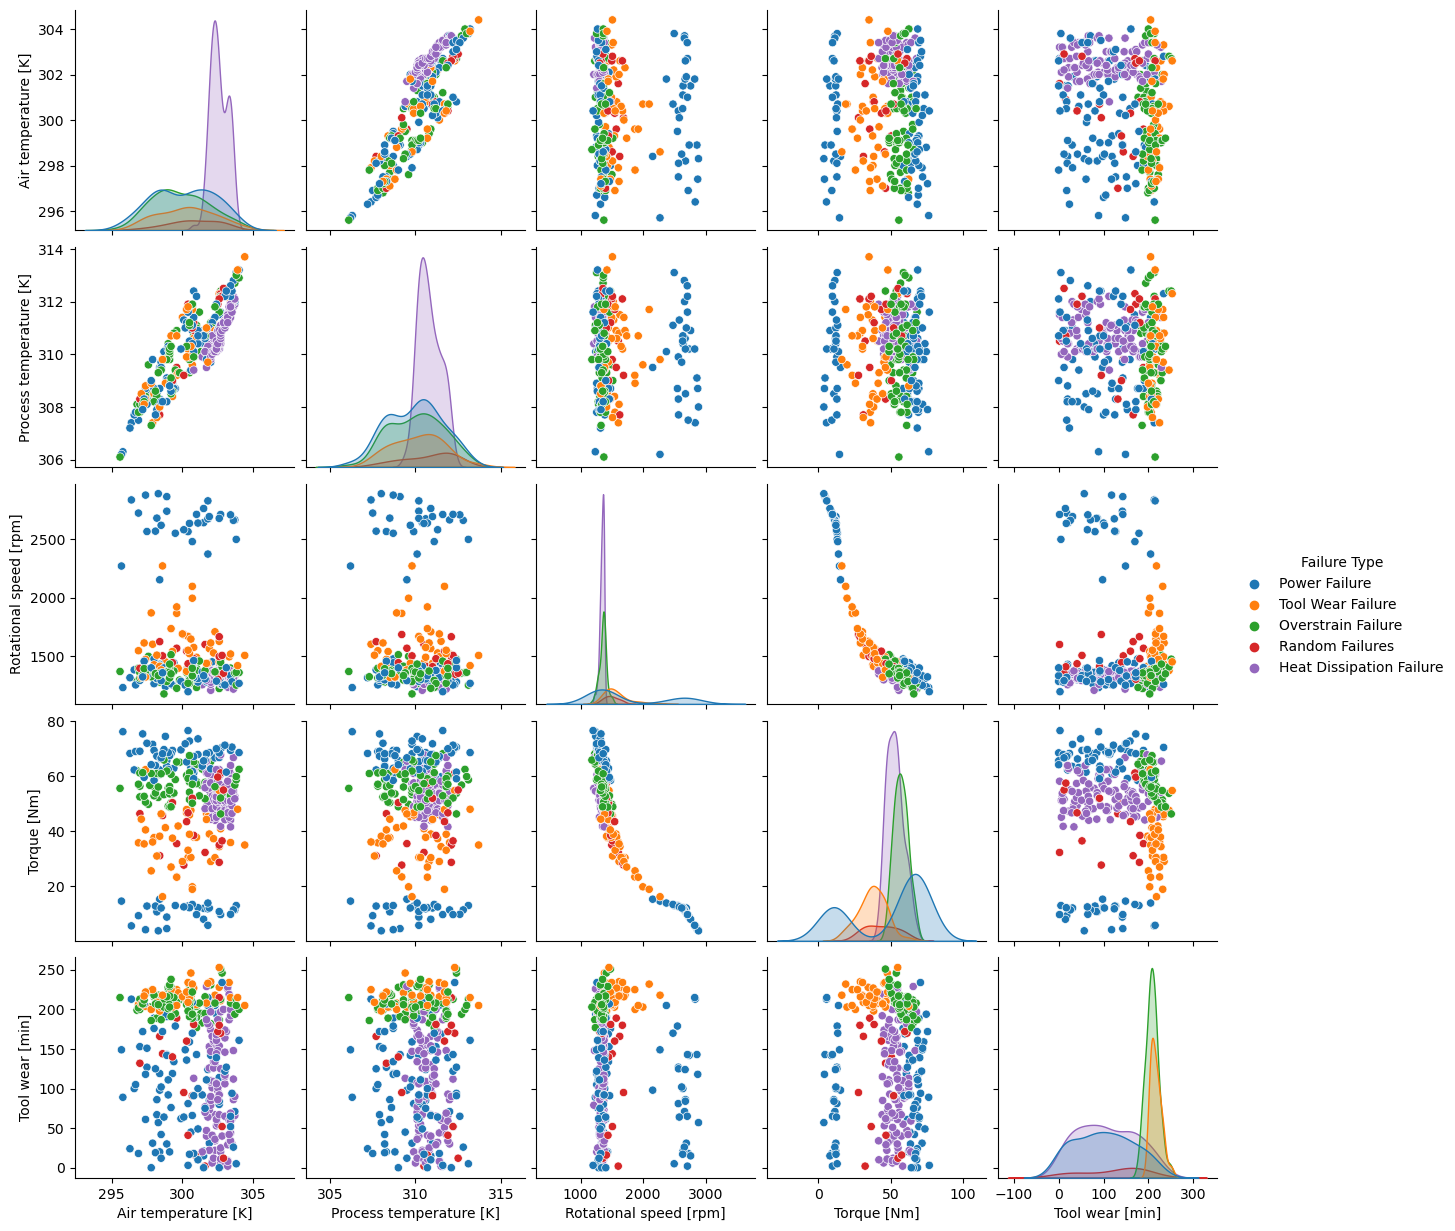

In [18]:
sns.pairplot(failure_data, hue = 'Failure Type');
plt.title('')

In [ ]:
# Heatmap and pair plot tables show Heat Dissipation Failures as being the most prevelant

In [19]:
# Create confusion matrix
features = ['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']
target = 'Failure Type_Heat Dissipation Failure'

# Split the data
X = encoded_data[features]
Y = encoded_data[target]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

# create regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, Y_train)

# make prediction
Y_pred = model.predict(X_test)

In [20]:
# Evaluate The model
accuracy = accuracy_score(Y_test, Y_pred)
confusion = confusion_matrix(Y_test, Y_pred)

# Print accuracy
print(accuracy)

0.946236559139785


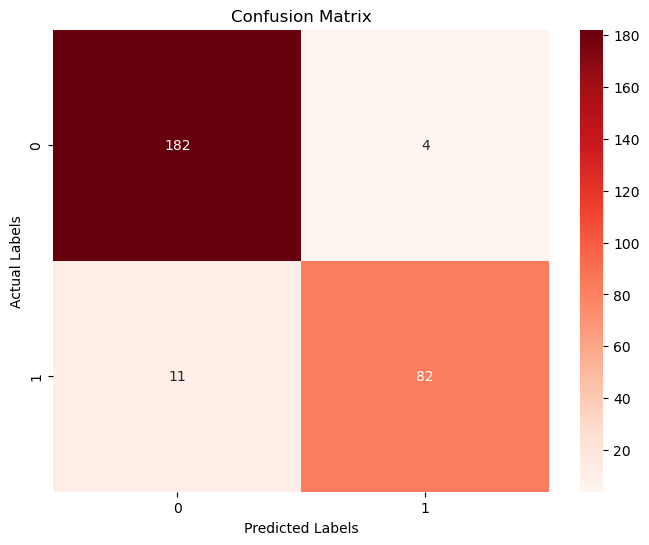

In [21]:
# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# the above confusion matrix validates my point with an accuracy of about 94.6%.